# Notebook – Ismael
## Project: Voorspelling Jeugdpopulatie Almere (CBS Wijken & Buurten)

**Doel van dit notebook:** Mijn taken uitvoeren volgens de teamplanning (CRISP-DM), met focus op filtering (Almere + wijkniveau), data understanding (15–25), feature engineering (ratio’s) en model-evaluatie (metrics).



---
## Voorbereiding

- Bestand inlezen vanuit `data/raw/`.
- Zorg dat paden kloppen vanuit `notebooks/individual/`.
- Werk stapsgewijs en sla na mijn deliverables de juiste CSV op in `data/processed/`.

In [3]:
# Import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [4]:
# df = pd.read_csv("../../data/raw/CBS_Kerncijfers.csv", sep=";", encoding="latin-1")
# df.head()

---
# Fase 1 – Data Structurering en Selectie

## Stap 1 – Filter Almere
**Doel:** Beperken tot alleen de gemeente Almere.

**Wat moet gebeuren:**
- Filter op `Gemeentenaam_1 = "Almere"`.
- Controleer of er geen andere gemeenten meer voorkomen.
- Vergelijk aantal rijen vóór en na filtering.

**Checks om te rapporteren:**
- Aantal rijen vóór filtering
- Aantal rijen na filtering
- Unieke waarden van `Gemeentenaam_1`

**Korte tekst (voor verslag):**
- Beschrijf kort wat er is gefilterd en waarom.

**Ruimte voor mijn code:**

In [5]:
# dataset inladen
df = pd.read_csv("../../data/processed/CBS_Kerncijfers_cleaned.csv", sep=";")

# aantal rijen vóór filtering
rows_before = len(df)

# strings opschonen (spaties of rare tekens)
df["Gemeentenaam_1"] = df["Gemeentenaam_1"].astype(str).str.strip()

# unieke waardes controleren (rapporteren)
unique_gemeenten = df["Gemeentenaam_1"].unique()
print("Aantal unieke gemeenten:", len(unique_gemeenten))

# filteren op Almere
df_almere = df[df["Gemeentenaam_1"] == "Almere"].copy()

# aantal rijen na filtering
rows_after = len(df_almere)

# outputs
print("Aantal rijen vóór filtering:", rows_before)
print("Aantal rijen na filtering:", rows_after)
print("Unieke waarden Gemeentenaam_1 na filtering:", df_almere["Gemeentenaam_1"].unique())

# opslaan van gefilterde dataset
output_path = "../../data/processed/df_v2_almere_only.csv"
df_almere.to_csv(output_path, sep=";", index=False)


# output
df_almere.head()

Aantal unieke gemeenten: 1
Aantal rijen vóór filtering: 1141
Aantal rijen na filtering: 1141
Unieke waarden Gemeentenaam_1 na filtering: ['Almere']


,ID,Peildatum,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3,IndelingswijzigingGemeenteWijkBuurt_4,AantalInwoners_5,Mannen_6,Vrouwen_7,...,PersonenPerSoortUitkeringAO_81,PersonenPerSoortUitkeringWW_82,PersonenPerSoortUitkeringAOW_83,JongerenMetJeugdzorgInNatura_84,PercentageJongerenMetJeugdzorg_85,WmoClienten_86,WmoClientenRelatief_87,TotaalDiefstalUitWoningSchuurED_88,VernielingMisdrijfTegenOpenbareOrde_89,GeweldsEnSeksueleMisdrijven_90
0,384,1-1-2025,GM0034,Almere,Gemeente,GM0034,1.0,229574,113738,115836,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,385,1-1-2025,WK003401,Almere,Wijk,WK003401,1.0,1810,880,930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,386,1-1-2025,BU00340101,Almere,Buurt,BU00340101,1.0,795,415,385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,387,1-1-2025,BU00340102,Almere,Buurt,BU00340102,1.0,1010,465,545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,388,1-1-2025,WK003402,Almere,Wijk,WK003402,1.0,2890,1395,1500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**CSV opslaan als:**  
`data/processed/df_v1_raw_clean.csv`

**Toelichting:**  
Deze dataset bevat de originele CBS-data waarbij alleen technische fouten zijn opgelost (correcte encoding, juiste kolomscheiding, geen lege of foutieve kolommen).  
Er is inhoudelijk nog niets gefilterd.

## Stap 2 – Alleen wijkniveau selecteren (WK)
**Doel:** Alleen werken met wijken (geen buurten en geen gemeente-totaal).

**Wat moet gebeuren:**
- Filter op `SoortRegio_2 = "Wijk"`.
- Controleer of `Codering_3` begint met `WK`.
- Bepaal het aantal unieke wijken.

**Checks om te rapporteren:**
- Unieke waarden van `SoortRegio_2`
- Aantal unieke `Codering_3`
- Lijst (of tabel) met wijkcodes en wijknamen

**Ruimte voor mijn code:**


In [ ]:
df_wijk = pd.read_csv("../../data/processed/df_v2_almere_only.csv", sep=";")

# kolommen opschonen
df_wijk.columns = df_wijk.columns.str.strip()

# waarden opschonen
df_wijk["SoortRegio_2"] = df_wijk["SoortRegio_2"].astype(str).str.strip()
df_wijk["Codering_3"] = df_wijk["Codering_3"].astype(str).str.strip()

print("Unieke waarden vóór filtering:")
print(df_wijk["SoortRegio_2"].unique())

# filter wijk
df_wijk = df_wijk[df_wijk["SoortRegio_2"] == "Wijk"].copy()

# filter WK-codes
df_wijk = df_wijk[df_wijk["Codering_3"].str.startswith("WK")].copy()

print("\nUnieke waarden na filtering:")
print(df_wijk["SoortRegio_2"].unique())

print("\nAantal unieke wijken:", df_wijk["Codering_3"].nunique())
df_wijk.to_csv("../../data/processed/df_v3_almere_wijken.csv", index=False)


Unieke waarden vóór filtering:
['Gemeente' 'Wijk' 'Buurt']

Unieke waarden na filtering:
['Wijk']

Aantal unieke wijken: 56


,ID,Peildatum,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3,IndelingswijzigingGemeenteWijkBuurt_4,AantalInwoners_5,Mannen_6,Vrouwen_7,...,PersonenPerSoortUitkeringAO_81,PersonenPerSoortUitkeringWW_82,PersonenPerSoortUitkeringAOW_83,JongerenMetJeugdzorgInNatura_84,PercentageJongerenMetJeugdzorg_85,WmoClienten_86,WmoClientenRelatief_87,TotaalDiefstalUitWoningSchuurED_88,VernielingMisdrijfTegenOpenbareOrde_89,GeweldsEnSeksueleMisdrijven_90
1,385,1-1-2025,WK003401,Almere,Wijk,WK003401,1.0,1810,880,930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,388,1-1-2025,WK003402,Almere,Wijk,WK003402,1.0,2890,1395,1500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,394,1-1-2025,WK003403,Almere,Wijk,WK003403,1.0,2500,1205,1300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,399,1-1-2025,WK003404,Almere,Wijk,WK003404,1.0,2220,1065,1155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,403,1-1-2025,WK003405,Almere,Wijk,WK003405,1.0,2365,1130,1235,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,405,1-1-2018,WK003401,Almere,Wijk,WK003401,NaN,22790,10990,11800,...,1330.0,490.0,4030.0,455.0,77.0,1630.0,72.0,5.0,4.0,5.0
1098,419,1-1-2018,WK003402,Almere,Wijk,WK003402,NaN,108800,54090,54710,...,5080.0,2340.0,10760.0,2180.0,68.0,5395.0,50.0,6.0,5.0,6.0
1115,442,1-1-2018,WK003403,Almere,Wijk,WK003403,NaN,56315,28110,28200,...,2640.0,1210.0,4670.0,1420.0,81.0,2470.0,44.0,4.0,4.0,5.0
1132,460,1-1-2018,WK003404,Almere,Wijk,WK003404,NaN,13430,6660,6775,...,410.0,310.0,510.0,275.0,65.0,280.0,21.0,3.0,4.0,4.0


**CSV opslaan als:**  
`data/processed/df_v2_almere_wijken.csv`

**Toelichting:**  
Deze dataset bevat uitsluitend wijken (WK-codes) binnen de gemeente Almere.  
Gemeente- en buurtniveau zijn verwijderd.  
Alle originele variabelen zijn nog aanwezig.

## Stap 3 – Controle van tijdstructuur
**Doel:** Controleren of elke wijk meerdere jaren heeft en of de dataset bruikbaar is als tijdreeks.

**Wat moet gebeuren:**
- Controleer per wijk het aantal aanwezige jaren (via `Peildatum` of een `Jaar`-kolom als die al bestaat).
- Controleer of combinatie `Wijk (Codering_3) + Jaar` uniek is.
- Noteer opvallende gaten (missende jaren) of dubbele records.

**Checks om te rapporteren:**
- Aantal jaren per wijk (min/ max / gemiddeld)
- Aantal dubbele wijk-jaar combinaties

**Oplevering (CSV opslaan):**
- `data/processed/df_v2_almere_wijken.csv`

**Wat bevat deze CSV:**
- Alleen Almere
- Alleen wijkniveau (WK)
- Alle originele kolommen (nog geen kolomselectie)

**Ruimte voor mijn code:**


In [7]:
# dataset inladen
df_wijk = pd.read_csv("../../data/processed/df_v3_almere_wijken.csv", sep=";")


# aantal jaren per wijk

jaren_per_wijk = df.groupby("Codering_3")["Peildatum"].nunique()

print("Aantal jaren per wijk:")
print(jaren_per_wijk.describe())  # statistieken

print("\nOverzicht aantal jaren per wijk:")
print(jaren_per_wijk.sort_values())


# uniciteit wijk + jaar

dubbele_combinaties = df.duplicated(subset=["Codering_3", "Peildatum"]).sum()

print("\nAantal dubbele wijk-jaar combinaties:", dubbele_combinaties)


# missende jaren per wijk

alle_jaren = sorted(df["Peildatum"].dropna().unique())

print("\nControle op missende jaren per wijk:")

for wijk, groep in df.groupby("Codering_3"):
    aanwezige_jaren = sorted(groep["Peildatum"].dropna().unique())
    missende_jaren = set(alle_jaren) - set(aanwezige_jaren)
    
    if missende_jaren:
        print(f"Wijk {wijk} mist jaren: {sorted(missende_jaren)}")


# dataset opnieuw opslaan 
df.to_csv("../../data/processed/df_v3_almere_wijken.csv", index=False)

Aantal jaren per wijk:
count    273.000000
mean       4.179487
std        1.222048
min        1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        8.000000
Name: Peildatum, dtype: float64

Overzicht aantal jaren per wijk:
Codering_3
BU00340372    1
BU00345901    1
BU00343007    1
BU00342206    1
WK003459      1
             ..
BU00340502    8
BU00340401    8
BU00340402    8
BU00340205    8
BU00340101    8
Name: Peildatum, Length: 273, dtype: int64

Aantal dubbele wijk-jaar combinaties: 0

Controle op missende jaren per wijk:
Wijk BU00340103 mist jaren: ['1-1-2022', '1-1-2023', '1-1-2024', '1-1-2025']
Wijk BU00340104 mist jaren: ['1-1-2022', '1-1-2023', '1-1-2024', '1-1-2025']
Wijk BU00340105 mist jaren: ['1-1-2022', '1-1-2023', '1-1-2024', '1-1-2025']
Wijk BU00340106 mist jaren: ['1-1-2022', '1-1-2023', '1-1-2024', '1-1-2025']
Wijk BU00340107 mist jaren: ['1-1-2022', '1-1-2023', '1-1-2024', '1-1-2025']
Wijk BU00340108 mist jaren: ['1-1-2022', '1-1-2023', '1-1

**CSV opnieuw opslaan als:**  
`data/processed/df_v2_almere_wijken.csv`

**Toelichting:**  
Na controle op dubbele wijk-jaar combinaties en aanwezigheid van meerdere jaren per wijk is de dataset gevalideerd als bruikbare tijdreeks.

---
# Fase 2 – Data Understanding

## Stap 4 – Groei 15–25 analyseren
**Doel:** Inzicht krijgen in de ontwikkeling van jongeren (15–25) per wijk door de tijd.

**Wat moet gebeuren:**
- Bekijk de trend van `k_15Tot25Jaar_9` per wijk over meerdere jaren.
- Bereken jaar-op-jaar verandering (verschil of percentage).
- Identificeer opvallende wijken of jaren (uitschieters).
- Lijngrafiek maken en vergelijken met 0-15 jaar.

**Ruimte voor mijn code:**


Samenvatting jaar-op-jaar groei (absolute verandering):
count      868.000000
mean       -33.355991
std        563.086277
min     -14320.000000
25%        -10.000000
50%          0.000000
75%         10.000000
max        497.000000
Name: Groei_15_25_abs, dtype: float64

Samenvatting jaar-op-jaar groei (percentage):
count    868.000000
mean       3.300992
std       40.953032
min      -97.914530
25%       -3.524436
50%        0.000000
75%        4.878049
max      600.000000
Name: Groei_15_25_pct, dtype: float64


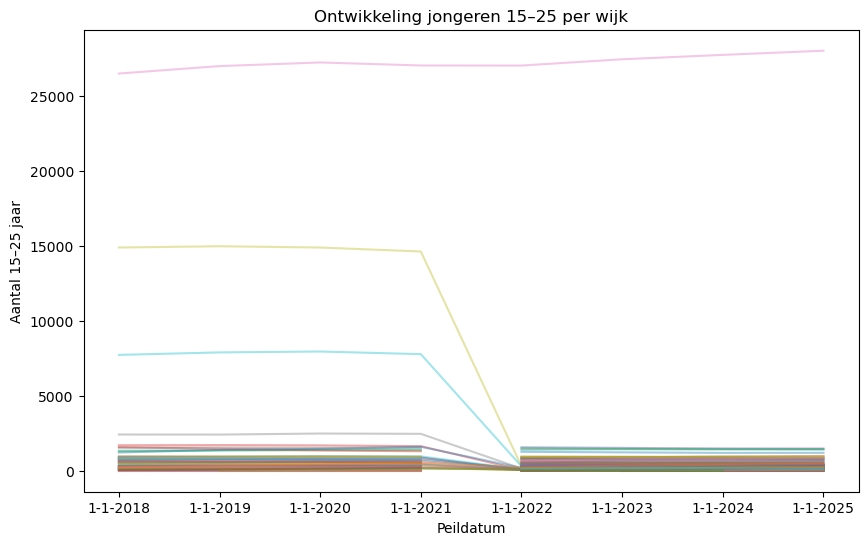

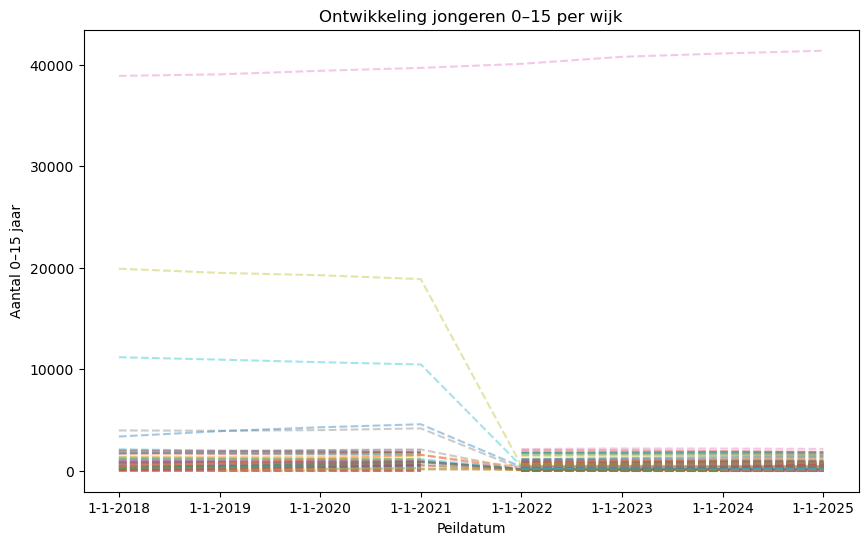

In [8]:
# dataset inladen
df = pd.read_csv("../../data/processed/df_v3_almere_wijken.csv")

# sorteren op wijk + jaar
df = df.sort_values(["Codering_3", "Peildatum"])


# jaar-op-jaar verschil berekenen

# absolute verandering
df["Groei_15_25_abs"] = df.groupby("Codering_3")["k_15Tot25Jaar_9"].diff()

# percentage verandering
df["Groei_15_25_pct"] = df.groupby("Codering_3")["k_15Tot25Jaar_9"].pct_change() * 100


# overzicht groei per wijk

print("Samenvatting jaar-op-jaar groei (absolute verandering):")
print(df["Groei_15_25_abs"].describe())

print("\nSamenvatting jaar-op-jaar groei (percentage):")
print(df["Groei_15_25_pct"].describe())


# lijngrafiek 15–25 per wijk

plt.figure(figsize=(10,6))

for wijk in df["Codering_3"].unique():
    subset = df[df["Codering_3"] == wijk]
    plt.plot(subset["Peildatum"], subset["k_15Tot25Jaar_9"], alpha=0.4)

plt.title("Ontwikkeling jongeren 15–25 per wijk")
plt.xlabel("Peildatum")
plt.ylabel("Aantal 15–25 jaar")
plt.show()


# Vergelijking met 0–15

plt.figure(figsize=(10,6))

for wijk in df["Codering_3"].unique():
    subset = df[df["Codering_3"] == wijk]
    plt.plot(subset["Peildatum"], subset["k_0Tot15Jaar_8"], linestyle="--", alpha=0.4)

plt.title("Ontwikkeling jongeren 0–15 per wijk")
plt.xlabel("Peildatum")
plt.ylabel("Aantal 0–15 jaar")
plt.show()

**CSV opslaan als:**  
`data/processed/df_v3_growth_analysis.csv`

**Toelichting:**  
Deze dataset bevat extra kolommen met jaar-op-jaar groei voor de leeftijdsgroep 15–25 jaar.  
De originele data blijft intact, maar er zijn analysekoppen toegevoegd.

## Stap 5 – Korte interpretatie (tekst)
**Doel:** Kort en duidelijk uitleggen wat de groei/krimp betekent.

**Vragen om te beantwoorden:**
- Groeien alle wijken ongeveer gelijk?
- Zijn er wijken met sterke stijging/daling?
- Zien we een breekpunt rond een bepaald jaar?
- Zijn de verschillen logisch/verklaarbaar?

**Mijn tekst (voor verslag):**
- (schrijf hier 5–10 zinnen)

---
# Fase 3 – Data Preparation

## Stap 6 – Ratio jongeren / totaal bevolking
**Doel:** Relatieve indicatoren maken zodat wijken eerlijker vergeleken kunnen worden.

**Wat moet gebeuren:**
- Maak ratio `0–15 / AantalInwoners` (op basis van `k_0Tot15Jaar_8` en `AantalInwoners_5`).
- Maak ratio `15–25 / AantalInwoners` (op basis van `k_15Tot25Jaar_9` en `AantalInwoners_5`).

**Waarom belangrijk:**
- Absolute aantallen groeien vaak mee met totale bevolkingsgroei.
- Ratio’s laten de echte demografische verschuiving zien.

**Checks om te rapporteren:**
- Min/max van ratio’s
- Zijn ratio’s logisch (tussen 0 en 1)?

**Ruimte voor mijn code:**


In [9]:
# dataset inladen (analyseklare wijkdataset)
df = pd.read_csv("../../data/processed/df_v5_clean_final.csv")

# zorgen dat de kolommen numeriek zijn 
df["AantalInwoners_5"] = pd.to_numeric(df["AantalInwoners_5"], errors="coerce")
df["k_0Tot15Jaar_8"] = pd.to_numeric(df["k_0Tot15Jaar_8"], errors="coerce")
df["k_15Tot25Jaar_9"] = pd.to_numeric(df["k_15Tot25Jaar_9"], errors="coerce")

# deling door 0 voorkomen (inwoners mag niet 0 of NaN zijn)
df = df[df["AantalInwoners_5"].notna() & (df["AantalInwoners_5"] > 0)].copy()

# ratio's berekenen
df["ratio_0_15"] = df["k_0Tot15Jaar_8"] / df["AantalInwoners_5"]
df["ratio_15_25"] = df["k_15Tot25Jaar_9"] / df["AantalInwoners_5"]

# checks
print("Ratio 0–15: min/max")
print(df["ratio_0_15"].min(), df["ratio_0_15"].max())

print("\nRatio 15–25: min/max")
print(df["ratio_15_25"].min(), df["ratio_15_25"].max())

# check of ratio's logisch zijn (tussen 0 en 1)
ratio_0_15_outside = ((df["ratio_0_15"] < 0) | (df["ratio_0_15"] > 1)).sum()
ratio_15_25_outside = ((df["ratio_15_25"] < 0) | (df["ratio_15_25"] > 1)).sum()

print("\nAantal ratio_0_15 buiten [0, 1]:", ratio_0_15_outside)
print("Aantal ratio_15_25 buiten [0, 1]:", ratio_15_25_outside)

# opslaan tijdelijke output
df.to_csv("../../data/processed/df_ratio_temp.csv", index=False)

FileNotFoundError: [Errno 2] No such file or directory: '../../data/processed/df_v5_clean_final.csv'

**CSV opslaan als:**  
`data/processed/df_v4_ratio_added.csv`

**Toelichting:**  
Deze dataset bevat nieuwe ratio-variabelen:
- Jongeren 0–15 / totaal inwoners  
- Jongeren 15–25 / totaal inwoners  

Hiermee kunnen wijken eerlijker worden vergeleken, onafhankelijk van bevolkingsgrootte.



## Stap 7 – Stabiliteit en plausibiliteit check
**Doel:** Controleren of de nieuwe features bruikbaar zijn.

**Wat moet gebeuren:**
- Controleer op onrealistische waarden (bijv. ratio > 1 of negatieve waarden).
- Check op null/NaN die ontstaan door deling (bijv. inwoners = 0).
- Noteer wat je aanpast/verwijdert en waarom.

**Oplevering (in teamverband):**
- De gezamenlijke output van fase 3 wordt opgeslagen als:
  - `data/processed/df_v6_model_ready.csv`

**Mijn bijdrage:**
- Ratio-features toegevoegd en gecontroleerd.

**Ruimte voor mijn code:**


In [ ]:
# dataset inladen (na ratio-feature engineering)
df = pd.read_csv("../../data/processed/df_ratio_temp.csv")

# kolommen die we willen controleren
ratio_cols = ["ratio_0_15", "ratio_15_25"]

# rapportage: NaN check (hoeveel zijn er per ratio?)
print("Aantal NaN waarden per ratio:")
print(df[ratio_cols].isna().sum())

# rapportage: onrealistische waarden check
# ratio hoort tussen 0 en 1 te liggen
for col in ratio_cols:
    buiten_range = df[(df[col] < 0) | (df[col] > 1)]
    print(f"\nAantal waarden buiten [0,1] voor {col}: {len(buiten_range)}")

# rijen verwijderen waar ratio NaN is of buiten range ligt
rows_before = len(df)

# eerst NaN verwijderen in ratio’s
df_clean = df.dropna(subset=ratio_cols).copy()

# daarna buiten-range ratio’s verwijderen
for col in ratio_cols:
    df_clean = df_clean[(df_clean[col] >= 0) & (df_clean[col] <= 1)]

rows_after = len(df_clean)

print("\nRijen vóór plausibiliteit check:", rows_before)
print("Rijen na plausibiliteit check:", rows_after)
print("Aantal verwijderde rijen:", rows_before - rows_after)

# opslaan
df_clean.to_csv("../../data/processed/df_ratio_checked.csv", index=False)


### Oplevering – Definitieve Model Dataset

**CSV opslaan als:**  
`data/processed/df_v6_model_ready.csv`

**Toelichting:**  
Dit is de definitieve model-klaar gemaakte dataset.  
Deze bevat:
- Alleen relevante variabelen  
- Nieuwe features (ratio’s, groei, lag)  
- Geen dubbele rijen  
- Correcte datatypes  
- Alleen wijkniveau Almere  

Deze dataset wordt gebruikt voor train/test split en modeling.

---
# Fase 4 – Modeling (Evaluatie: mijn rol)

## Stap 8 – Modelmetrics berekenen
**Doel:** Beoordelen hoe goed het model voorspelt.

**Wat heb ik nodig:**
- `y_test` (echte waarden)
- `y_pred` (voorspelde waarden)

**Metrics:**
- MAE (Mean Absolute Error)
- RMSE (Root Mean Squared Error)
- R²

**Wat moet ik rapporteren:**
- De drie getallen (MAE/RMSE/R²)
- Korte interpretatie: is dit goed of slecht, en waarom?

**Ruimte voor mijn code:**


In [ ]:
# Dataset inladen
df = pd.read_csv("../../data/processed/df_v6_model_ready.csv")

# X (voorspeller) en y (target)
X = df[["ratio_15_25"]]
y = df["k_15Tot25Jaar_9"]

# model maken
model = LinearRegression()
model.fit(X, y)

# voorspellen
y_pred = model.predict(X)


# metrics berekenen
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R²:", round(r2, 4))


# Scatterplot + regressielijn
plt.scatter(X, y)
plt.plot(X, y_pred, color="red")
plt.xlabel("Ratio 15–25 / totaal bevolking")
plt.ylabel("Aantal jongeren 15–25")
plt.title("Lineair verband ratio vs jeugdpopulatie")
plt.show()

---
# Fase 5 – Evaluatie & Reflectie (mijn input)

**Kritische punten om te benoemen:**
- Is de tijdreeks lang genoeg (aantal jaren)?
- Heeft een wijkwijziging (indeling) invloed op trends?
- CBS-data bevat soms afrondingen/lege waarden; wat is de impact?
- Welke aannames maken we en wat betekent dat voor betrouwbaarheid?

**Mijn tekst (voor verslag):**
- (schrijf hier 8–12 zinnen)

---
## Checklist – Wat ik oplever

- `data/processed/df_v2_almere_wijken.csv` (na filtering Almere + wijkniveau)
- Input/observaties voor Data Understanding (15–25 trend)
- Ratio-features (0–15/inwoners en 15–25/inwoners) voor `df_v6_model_ready`
- Modelmetrics (MAE, RMSE, R²) zodra `y_test` en `y_pred` beschikbaar zijn

## Waarom elke stap een aparte CSV krijgt

Door elke fase als aparte dataset op te slaan:

- Is het proces reproduceerbaar  
- Kunnen fouten eenvoudig worden teruggedraaid  
- Is het CRISP-DM proces zichtbaar toegepast  
- Kan elke stap afzonderlijk worden gecontroleerd  
- Wordt direct modelleren op ruwe data voorkomen 